# LEPL1106, Devoir 3 : représentation d'état

## 0) Introduction et objectif


*Vous venez d'acheter une maison à rénover qui se situe à côté d'un héliport. Pour limiter les nuisances sonores liées au décollage et à l'atterrissage des hélicoptères, vous cherchez à mieux isoler acoustiquement la maison. Pour répondre à ce problème, vous allez évaluer la transmission des bruits de moteurs dans la maison à partir d'un système modélisant cette transmission.*

On vous demande donc de créer une fonction qui calcule la réponse impulsionnelle d'un système, ainsi que l'évolution de la sortie de ce système (sa *réponse*) en fonction d'une entrée donnée. On vous demande également de trouver la représentation d'état du système, ainsi que de répondre à un petit QCM en fin de devoir.

Pour créer, stocker, et opérer sur les signaux, on utilisera le package [`NumPy`](http://www.numpy.org/) de Python. Pour manipuler les systèmes, on utilisera le package [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html).

In [1]:
import numpy as np
import scipy.signal as sg

import matplotlib.pyplot as plt

## 1) Consignes

En partant du template fourni ci-dessous, complétez la fonction  `(ty,y) = systemeDiscret(A,B,C,D,ts,x=None)` qui calcule la réponse d'un système discret à un signal d'entrée donné.
Votre fonction prendra comme arguments:

- Les matrices (numpy array) ``A``, ``B``, ``C``, ``D`` qui correspondent au système avec pour représentation d'état
$$
    \begin{align}
        q[n+1]&=Aq[n]+Bx[n],\\
          y[n]&=Cq[n]+Dx[n]
    \end{align}
    \label{eq:rep}
$$
et qui ont donc les dimensions adéquates.

- ``ts``qui donne le temps d'échantillonnage $t_s>0$ (i.e., temps entre deux mesures consécutives) du système en secondes. Si le système est discret par nature, n'importe quelle valeur pour ``ts`` peut être utilisée, mais la plus naturelle est ``ts``=1.

- ``x`` qui est un signal d'entrée $x[n]$ discret sous forme vectorielle (numpy array). Ce signal commence en $t=0$ et a un temps d'échantillonage de $t_s$. Cette entrée est optionnelle.

Votre fonction doit fournir en sortie (sous forme de numpy array)

- `y`, la réponse du système $y$ pour l'entrée $x$ si celle-ci est fournie (autrement dit, si `x` est différent de `None`), **autrement `y` est la réponse impulsionnelle du système.**
- `ty` le vecteur temps associé au signal `y`, qui doit être cohérent avec la valeur ``ts``. 

On vous demande que chaque sortie soit un vecteur, ce qui signifie par exemple que la commande `ty.shape` doit vous retourner quelque chose de la forme `(100,)` (et non pas `(100,1)`).  Pour passer d'une représentation à l'autre vous pouvez utiliser la fonction `reshape` de numpy, ou la fonction `squeeze`.


Vous avez réussi à modéliser la manière dont le bruit se transmet dans la maison en fonction de paramètres liés aux matériaux de construction (isolants ou non) utilisés. Ainsi, si $x[n]$ représente le bruit d'un moteur et $y[n]$ l'expression du bruit dans la maison, on a

$$ y[n] = \alpha x[n] + \beta y[n-1].$$

Remarquez que nous travaillons ici sur une version discrétisée du problème, ce qui est assez courant en pratique.
Pour pouvoir tester ce modèle dans votre fonction ``systemeDiscret``, vous devez en trouver la représentation d'état. Ainsi, on vous demande d'implémenter la fonction ``(A,B,C,D) = computeMatrices(alpha,beta)`` qui prend en entrée les variables $\alpha$ et $\beta$  et retourne les matrices de la représentation d'état.


Fonctions à utiliser: `StateSpace`, `dimpulse`, `dlsim` (*note: si vous ne savez pas ce que font ces fonctions, allez lire leur documentation ou utilisez ``help(sg.nomDeLaFonction)``)*.

Vous devrez également adapter le [`docstring`](https://realpython.com/documenting-python-code/#documenting-your-python-code-base-using-docstrings) (commentaire au début de votre fonction, qui s'affiche quand on tape ``help(nomDeLaFonction)``) comme indiqué dans les devoirs précédents.

### Evaluation

Les critères et modalités d'évaluation sont repris ci-dessous :

- *Respect consignes (1 point)* : description précise des fonction et présence de toutes les informations importantes en commentaire, tentative d'atteindre l'objectif du devoir.
- *Fonction systemeDiscret (3 points)* : la fonction soumise remplit les objectifs du devoir et passe avec succès des tests simples, moyens et avancés.
- *Fonction computeMatrices (1 point)* : la fonction soumise remplit les objectifs du devoir
- *Interprétation des réponses impulsionnelles (3 points)* : réponses correctes.

### Deadline

Le vendredi 10 mars à 20h00. Aucune extension n'est possible, prenez vos dispositions pour soumettre à temps, d'autant plus qu'**il est possible de faire seulement 5 soumissions par heure**.

### Précision
La remise par deux est autorisée pour peu que

- les deux étudiants soient membres du même groupe de TP ;
- les deux étudiants soient inscrits dans la même team sur la plateforme INGInious.

## 2) Questions




Définis(sez) et commente(z) les fonctions ``systemeDiscret`` et ``computeMatrices``.


In [35]:
## LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS
def systemeDiscret(A,B,C,D,ts,x=None):
    y = 0 #TODO
    Delta = np.array([1,0])
    print(Delta)
    size = 100
    delta = "{:e}".format(0.000001)
    print(delta)
    
    ty = np.arange(0,size*ts, ts) 
    
    x = np.zeros(size)
    q = np.zeros(size+1) #car décalage
    y = np.zeros(size)
    x[0] = 1
    
    
    # calcule la réponse impulsionnelle __ Pour l'instant que en 0 et ts
    testI = 0
    for testI in range(size):
        q[testI+1] = A*q[testI] + B*x[testI]
        y[testI] = C*q[testI] + D*x[testI]
    """
    q = np.array([0, B[0]])
    y = np.array([D[0], C[0]*q[1]])
    print(y)
    print(ty)
    """
    #print(np.convolve(y, Delta))
    # donne la réponse pour un x --> donc pas la réponse impulsionelle
    if(type(x) != type(None)):
        print("___convolution___")
        y = np.convolve(y,x)
        ty = np.arange(0, y.shape[0]*ts,ts)
        print(y)

    print(ty.shape)
    print(y.shape)
    return (ty, y)

In [36]:
## LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS
def computeMatrices(alpha,beta):
    
    A = 0 #TODO
    B = 0 #TODO
    C = 0 #TODO
    D = 0 #TODO
    
    return (A,B,C,D)

Maintenant, teste(z) la fonction écrite en utilisant la cellule ci-dessous. 

[1 0]
1.000000e-06
___convolution___
[-1.10000000e+00  4.00000000e-01  8.00000000e-02  1.60000000e-02
  3.20000000e-03  6.40000000e-04  1.28000000e-04  2.56000000e-05
  5.12000000e-06  1.02400000e-06  2.04800000e-07  4.09600000e-08
  8.19200000e-09  1.63840000e-09  3.27680000e-10  6.55360000e-11
  1.31072000e-11  2.62144000e-12  5.24288000e-13  1.04857600e-13
  2.09715200e-14  4.19430400e-15  8.38860800e-16  1.67772160e-16
  3.35544320e-17  6.71088640e-18  1.34217728e-18  2.68435456e-19
  5.36870912e-20  1.07374182e-20  2.14748365e-21  4.29496730e-22
  8.58993459e-23  1.71798692e-23  3.43597384e-24  6.87194767e-25
  1.37438953e-25  2.74877907e-26  5.49755814e-27  1.09951163e-27
  2.19902326e-28  4.39804651e-29  8.79609302e-30  1.75921860e-30
  3.51843721e-31  7.03687442e-32  1.40737488e-32  2.81474977e-33
  5.62949953e-34  1.12589991e-34  2.25179981e-35  4.50359963e-36
  9.00719925e-37  1.80143985e-37  3.60287970e-38  7.20575940e-39
  1.44115188e-39  2.88230376e-40  5.76460752e-41  1.1

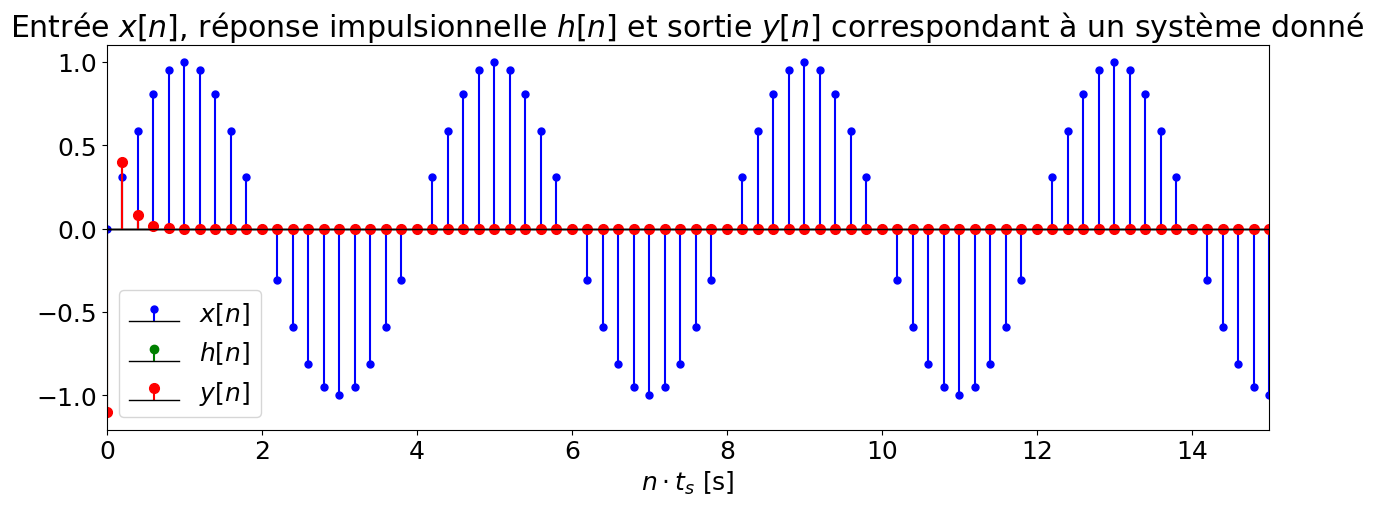

In [37]:
## CELLULE DE TEST

# Créer un signal sinusoidal discret
ts = 0.2
tx = np.arange(0, 20+ts, ts)
x = np.sin(0.5*np.pi*tx)

# Créer un système
A = np.array([0.2])
B = np.array([0.2])
C = np.array([2.0])
D = np.array([-1.1])

#Décommenter si vous voulez utiliser computeMatrices pour trouver A,B,C,D:
#A,B,C,D = computeMatrices(1,1)

# Obtenir la reponse impulsionelle
th, h = systemeDiscret(A, B, C, D, ts)

# Obtenir la reponse à l'entrée x[n]
ty, y = systemeDiscret(A, B, C, D, ts, x)


# Affichage
plt.figure(figsize=(15,5))
plt.rcParams.update({"font.size" : 18})

mk_x, st_x, bl_x = plt.stem(tx, x, label="$x[n]$", use_line_collection=True)
mk_h, st_h, bl_h = plt.stem(th, h, label="$h[n]$", use_line_collection=True)
mk_y, st_y, bl_y = plt.stem(ty, y, label="$y[n]$", use_line_collection=True)

mks = (mk_x, mk_h, mk_y)
sts = (st_x, st_h, st_y)
bls = (bl_x, bl_h, bl_y)

colors = ("b", "g", "r")
sizes = (5, 6, 7)

# Donner du style aux signals de façon compacte 
for mk, st, bl, c, s in zip(mks, sts, bls, colors, sizes):
    bl.set_color('k') 
    bl.set_linewidth(1)
    mk.set_markersize(s)
    mk.set_color(c) 
    st.set_color(c) 

    
plt.xlim([0.0, 15.0])

plt.title("Entrée $x[n]$, réponse impulsionnelle $h[n]$ et sortie $y[n]$ correspondant à un système donné ")
plt.xlabel('$n\cdot t_s$ [s]')

plt.legend()
plt.show()

## QCM

Vous retrouverez le QCM sur Inginious. On vous y demande de donner la stabilité et la causalité d'un système sur base de sa réponse impulsionnelle. 

Les réponses impulsionnelles présentées sur Inginious sont les réponses impulsionnelles du système avec $\alpha, \beta = (0.1, -0.995); (0.1,1.0001); (2,0.8).$ 

Vous pouvez donc vérifier à l'aide du code ci-dessous si votre implémentation des deux fonctions précédentes est correcte, et écouter l'effet du choix des matériaux isolants (le système) sur les bruits de moteurs (enregistré dans ``bruit_moteur.wav`` fourni sur Moodle).


In [ ]:
from scipy.io.wavfile import read, write

fs, x = read("data/bruit_moteur.wav")
typeL = type(x[0]) #Le type utilisé par votre ordinateur pour les fichiers sons
ts = 1/fs

#modifier pour voir les autres cas
alpha = 0.1
beta = 0.995

A1,B1,C1,D1 = computeMatrices(alpha,beta)

# Affichage
plt.figure(figsize=(15,5))
plt.rcParams.update({"font.size" : 18})

[th1, h1] = systemeDiscret(A1, B1, C1, D1, ts)
_,_, bl = plt.stem(th1, h1, label="$h[n]$", use_line_collection=True)
bl.set_color('k') 
bl.set_linewidth(1)

plt.title("Réponse impulsionnelle $h[n]$ d'un système donné ")
plt.xlabel('$n\cdot t_s$ [s]')

plt.legend()
plt.savefig(str(alpha)+"_"+str(beta)+".png") 
plt.show()

[ty1, y1] = systemeDiscret(A1, B1, C1, D1, ts, x)


# Ce cast de y1 est nécessaire pour que le fichier soit lu, 
# mais tronque certaines données
y1 = y1.astype(typeL) 
write("sortie.wav", fs, y1)

Vous pouvez aller lire les fichiers `sortie.wav` ainsi obtenus à l'aide de votre lecteur préféré.